In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

from nets import *
from cfgs import *
from data import *
from trainer import *
from payment_utils import get_payment


In [2]:
%matplotlib inline
save_plot = False
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
D = 201

x = np.linspace(0, 2.5, D)
X_tst = np.stack([v.flatten() for v in np.meshgrid(x,x)], axis = -1)
print(X_tst.shape)

cfg = additive_1x2_gamma_1_3_config.cfg
cfg.test.batch_size = D
cfg.test.num_batches = int(X_tst.shape[0]/cfg.test.batch_size)
cfg.test.save_output = True

(40401, 2)


In [3]:
Net = additive_net.Net
Generator = gamma_1_3_generator.Generator
Trainer = trainer.Trainer

In [4]:
net = Net(cfg, "test")
generator = Generator(cfg, 'test', X_tst)
m = Trainer(cfg, "test", net)
m.test(generator)

2025-11-14 15:02:17,736:INFO:TEST ALL-400000: t = 0.2493, Net_Loss: -1.362240, Revenue: 1.362240


In [5]:
alloc = np.load(os.path.join(cfg.dir_name, "alloc_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D,2)
pay = np.load(os.path.join(cfg.dir_name, "pay_tst_" + str(cfg.test.restore_iter) + ".npy")).reshape(D,D)

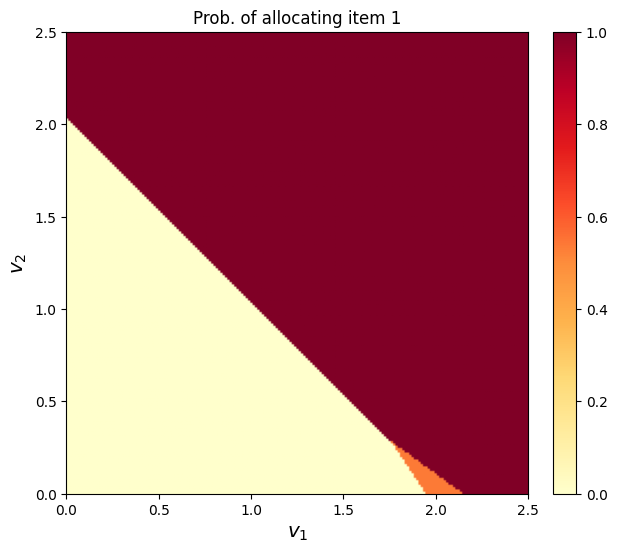

In [6]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

img = ax.imshow(alloc[::-1, :, 0], extent=[0,2.5,0,2.5], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
                    
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title('Prob. of allocating item 1')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc1.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

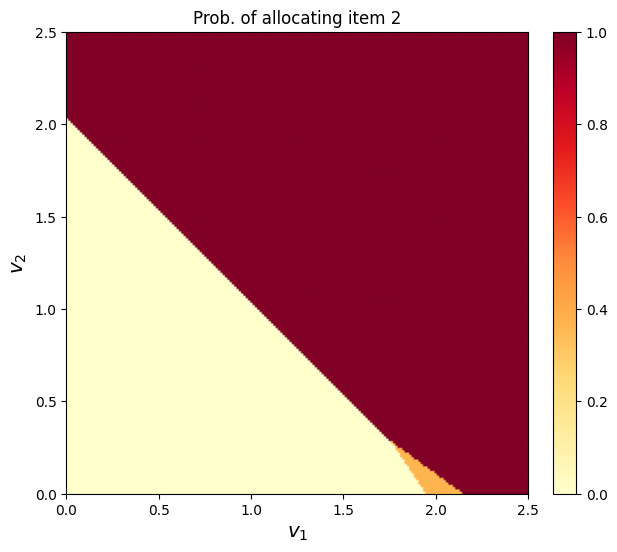

In [7]:
plt.rcParams.update({'font.size': 10, 'axes.labelsize': 'x-large'})
fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = (8,6))

img = ax.imshow(alloc[::-1, :, 1], extent=[0,2.5,0,2.5], vmin = 0.0, vmax=1.0, cmap = 'YlOrRd')
              
ax.set_xlabel(r'$v_1$')
ax.set_ylabel(r'$v_2$')
plt.title('Prob. of allocating item 2')
_ = plt.colorbar(img, fraction=0.046, pad=0.04)

if save_plot:
    fig.set_size_inches(4, 3)
    plt.savefig(os.path.join(cfg.dir_name, 'alloc2.pdf'), bbox_inches = 'tight', pad_inches = 0.05)

In [8]:
# インタラクティブなプロット（plotly使用）- マウスホバーで座標と値を表示
x_max = x[-1]  # Cell 1で定義されたxの最大値を使用

# データを準備
pay_display = pay  # データは反転しない
x_coords = np.linspace(0, x_max, D)
y_coords = np.linspace(0, x_max, D)

# plotlyのヒートマップを作成
fig = go.Figure(data=go.Heatmap(
    z=pay_display,
    x=x_coords,
    y=y_coords,
    colorscale='YlOrRd',
    colorbar=dict(title="Payment"),
    hovertemplate='v₁=%{x:.3f}<br>v₂=%{y:.3f}<br>Payment=%{z:.6f}<extra></extra>',
    name=''
))

fig.update_layout(
    title='Payment (Interactive - Hover to see values)',
    xaxis_title='v₁',
    yaxis_title='v₂',
    width=800,
    height=600
)

# HTMLファイルとして保存して表示（最も確実な方法）
html_file = os.path.join(cfg.dir_name, 'pay_interactive.html')
fig.write_html(html_file)
print(f"インタラクティブなプロットを保存しました: {html_file}")
print("ブラウザで開くと、マウスホバーで座標と値を表示できます。")

# Jupyter Notebook内で表示を試みる
try:
    from IPython.display import HTML, IFrame
    display(HTML(f'<iframe src="{html_file}" width="850" height="650"></iframe>'))
except:
    try:
        from IPython.display import display, HTML
        display(HTML(f'<a href="{html_file}" target="_blank">インタラクティブなプロットを開く</a>'))
    except:
        pass

if save_plot:
    try:
        fig.write_image(os.path.join(cfg.dir_name, 'pay.pdf'))
    except:
        pass  # write_imageが使えない場合はスキップ


インタラクティブなプロットを保存しました: experiments/additive_1x2_gamma_1_3/pay_interactive.html
ブラウザで開くと、マウスホバーで座標と値を表示できます。


/Users/harashimakoshi/work/deep-opt-auctions/venv/lib/python3.12/site-packages/IPython/core/display.py:447: UserWarning:

Consider using IPython.display.IFrame instead



In [9]:
# 使用例
idx1, idx2, actual_v1, actual_v2, payment_val = get_payment(x, pay, 2.02, 0)
print(f"v1={0.3:.2f}→{actual_v1:.4f}, v2={0.7:.2f}→{actual_v2:.4f}: payment={payment_val:.6f}")


v1=0.30→2.0250, v2=0.70→0.0000: payment=0.000000
